# **Project Name - Global Terrorism Analysis**

##### **Project Type**    - EDA
##### **Contribution**    - Individual

## **Summary**

In this Capstone Project, we are going to perform Exploratory Data Analysis on terrorism dataset to find out the hot zone of terrorism. Exploratory data analysis is nothing but analyzing the given data and finding the trends, patterns and making some assumptions. In this dataset, there are many features including countries, states, regions, gang names, weapon types, target types, years, months, days, and many more features.

## **Main effects of terrorism on international business**

On a broader scale, terrorism hurts international trade. This may be due to imminent threats, such as compromised trade routes and distribution systems, or because of the psychological and physical reactions to terrorism. This also means less foreign direct investment (FDI), especially in unstable countries.



## **Importing libraries**

In [1]:
#Basic Dependencies
import pandas as pd
import numpy as np
#For basic plotting graphs and charts
import matplotlib.pyplot as plt
%matplotlib inline
# Using Plotly instance methods to plot your data on interactive maps and charts
import plotly.express as px
import plotly.graph_objects as go
# For more plotting options
import seaborn as sns
# To just ignore all the warnings.
import warnings
warnings.filterwarnings("ignore")

## **Dataset Loading**

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# File Directory path from Google Drive 
File_Path= "/content/drive/MyDrive/Copy of Global Terrorism Data.csv"

In [3]:
File_Path= "D:\project\GTD Analysis Almabetter\Global Terrorism Data.csv"

In [4]:
# Importing Global Terrorism File.
df= pd.read_csv(File_Path,encoding='latin-1')

### **Information of Data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

### **Dataset First View**

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Fixing structural errors and Filtering unwanted elements

Data preprocessing is the first step to be done after collecting data. It is a set of operations performed on the START (Study of Terrorism and Response to Terrorism) dataset to modify ambiguous data which can be a bottleneck to analytical results. Data preprocessing methodology helps in converting this raw data into a more meaningful, focused, interpretable and readable format.

In [ ]:
# Columns Present in Dataset
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
# Renaming the columns which contains important values for analysis
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
# Using important columns in dataframe
df=df[['Year','Month','Day','Country','State','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [ ]:
# Statistial Value of the Dataset
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


### **Null Value Present On Dataset**

In [ ]:
print(df.shape) # Shape of the dataframe after filttering unwanted columns

print(df.isnull().sum()) # Number of Null elements in dataframe

(181691, 18)
Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64


### **Heatmap to Visualise the Null Presence**

<Figure size 432x360 with 0 Axes>

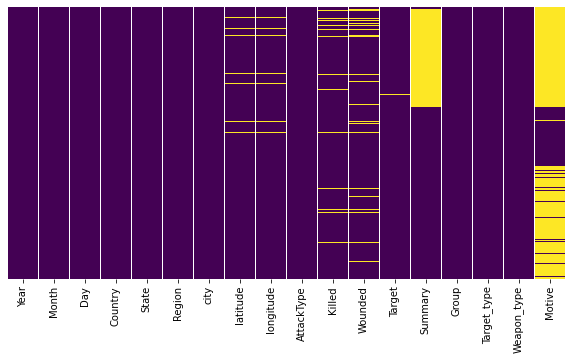

In [ ]:
plt.figure(figsize=(6,5))
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### ***Data Wrangling***

## **Filling out the missing values**

Above we can see that most of the important column contains alot of NaN or missing values Thus to make a sense out of all that we will start re-placing those values with 'UNKNOWN' value to make it is when we visualize the data via Plots and Graphs. Also You can’t ignore missing data because many algorithms will not accept missing values.

In [8]:
# State Columns
df['State'].fillna('Unknown',inplace=True)

# City Columns
df['city'].fillna('Unknown',inplace=True)

# Target Columns
df['Target'].fillna('Unknown',inplace=True)

# Total killed Columns
df['Killed'] = df['Killed'].fillna(df['Killed'].mode()[0]) 

# Total_Wounded Column
df['Wounded'] = df['Wounded'].fillna(df['Wounded'].mode()[0])

# Summery column
df['Summary'].fillna('Undocumented', inplace = True)

# Motive column
df['Motive'].fillna('Unknown',inplace=True)

# Creating a new Column to show total_Casualities which is just a total number of people who got wounded and 
# killed in that incident including all Attackers, Defenders and Civilians

df['Total_Casualities'] = df['Killed'] + df['Wounded']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               181691 non-null  int64  
 1   Month              181691 non-null  int64  
 2   Day                181691 non-null  int64  
 3   Country            181691 non-null  object 
 4   State              181691 non-null  object 
 5   Region             181691 non-null  object 
 6   city               181691 non-null  object 
 7   latitude           177135 non-null  float64
 8   longitude          177134 non-null  float64
 9   AttackType         181691 non-null  object 
 10  Killed             181691 non-null  float64
 11  Wounded            181691 non-null  float64
 12  Target             181691 non-null  object 
 13  Summary            181691 non-null  object 
 14  Group              181691 non-null  object 
 15  Target_type        181691 non-null  object 
 16  We

Now as the data cleaning and sorting as been done. Let`s dive deep into the elements to provide meaningful insights and virtualizations

## **Data Analysis**

This section consists of details regarding the visual results and insights.

### **Chart - 1**
#**Terrorist Activities in each Year**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Terrorist Activities in each Year')

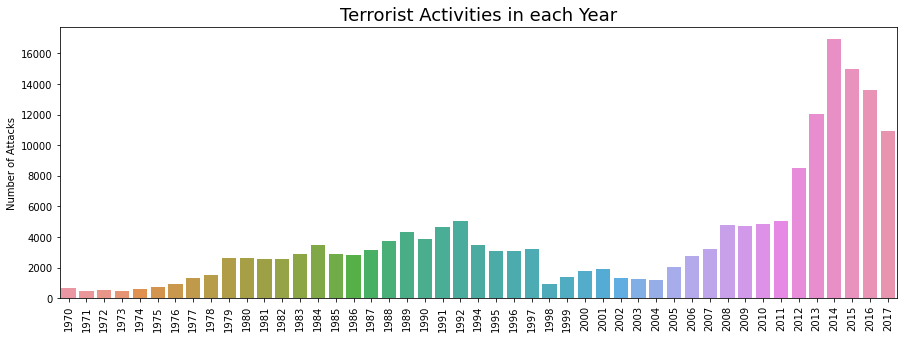

In [ ]:
#a=df.groupby("Year")["Killed"].count()
plt.subplots(figsize=(15,5))
sns.barplot(df['Year'].value_counts().index, df['Year'].value_counts().values)
plt.xticks(rotation=90)
#a.plot(kind="bar",figsize=(20,5))
plt.ylabel('Number of Attacks')
plt.title('Terrorist Activities in each Year',fontsize=18)

Attacks were more during 2014 and then in 2015. When compared to attacks from 1970 onwards, the last 6 years scored a maximum. But from 2014 onwards count started decreasing.

### **Chart- 2**
## **Number of Total Attack in each Region in Between 1970 to 2017**

In [ ]:
df['Region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

Text(0.5, 1.0, 'Number of Total Attack in each Region')

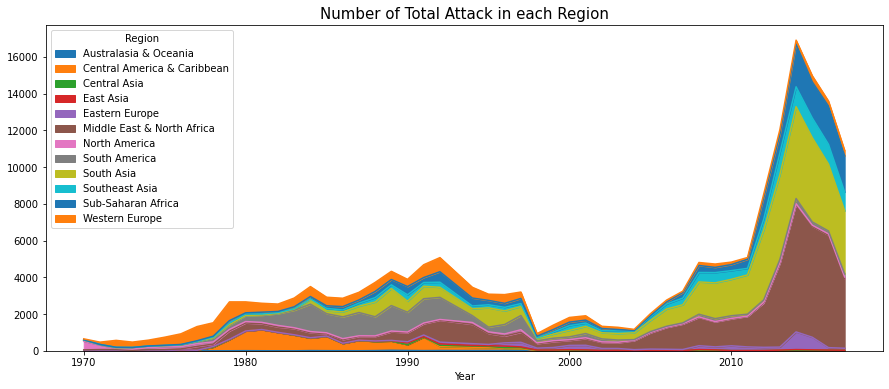

In [ ]:
b=df.groupby(["Year","Region"])["Year"].count().unstack()
b.plot(kind="area",figsize=(15,6))
plt.title("Number of Total Attack in each Region",fontsize=15)

 From 1970 to 2017, the Middle East and North Africa suffered from the most terrorist attacks and leads 1st among all the regions and then South Asia takes 2nd place. 

In [ ]:
# Death Count and it`s distribution accros the region
total_casualities_con = df.groupby(['Region'])['Total_Casualities'].sum().reset_index()

total_casualities_con['%per'] = (total_casualities_con['Total_Casualities']/total_casualities_con['Total_Casualities'].sum())*100
total_casualities_con

,Region,Total_Casualities,%per
0,Australasia & Oceania,410.0,0.043816
1,Central America & Caribbean,37699.0,4.028803
2,Central Asia,3009.0,0.321565
3,East Asia,10365.0,1.107683
4,Eastern Europe,19460.0,2.079644
5,Middle East & North Africa,351950.0,37.612064
6,North America,26447.0,2.826328
7,South America,45553.0,4.868141
8,South Asia,242679.0,25.934531
9,Southeast Asia,41896.0,4.477326


In this chart, we see the number of deaths from terrorism by region. Out of Total deaths till now from terrorism included in the Global Terrorism Database 3,51,950 which is roughly 37.61% occurred in the Middle East and North Africa. As when we move to South Asia, the situation doesn`t feel good either as on-paper about 2,42,679 confirmed deaths has been recorded which contribute 25.93% of the total death mark compared to the world.

Australasia & Oceania has the lowest confirmed death count of 0.04% from terrorism by region.

**Chart- 3**
## **Most Targeted Cities in the world by Terrorism**

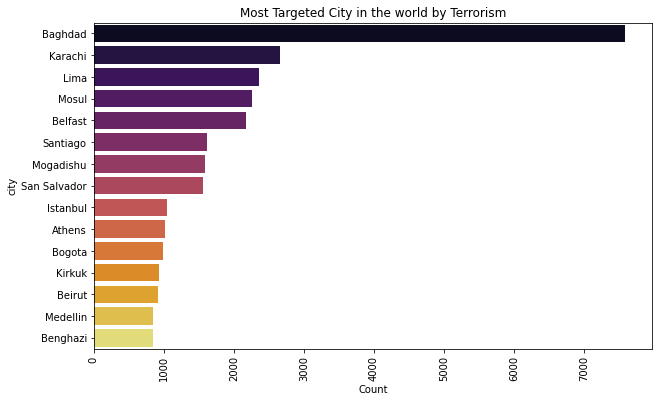

In [ ]:
# Ploting a bar chart with seaborn
total_casualities_city = df['city'].value_counts().reset_index().rename(columns={'index':'city','city':'Count'})

# Using matplotlib to plot a line chart to vitualize the data above 
sns.barplot(y = total_casualities_city['city'][1:16], x= total_casualities_city['Count'][1:16], palette=('inferno'))
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('Most Targeted City in the world by Terrorism')
plt.show()

Here is the bar graph of number of attacks for top 15 countries for year 1970-2017. Looking at the graph it seems that Baghdad is the most dangerous city to live in, then comes Karachi, Lima,Mosul, Belfast and rest.

**Chart- 4**
## **Attacking Methods By** **Terrorists**

In [ ]:
top_attack_tac = df['AttackType'].value_counts().reset_index().rename(columns={'index':'AttackType','AttackType':'Count'})

fig = px.pie(top_attack_tac, values='Count', names='AttackType',  height = 500, width = 800)
fig.update_layout(title="Attacking Methods By Terrorists")
fig.show()

Most of the attacks were through either Bombing or Explosion.

**Chart- 5**
## **Number Of Total Attack In Each Country**

In [ ]:
df['Country'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


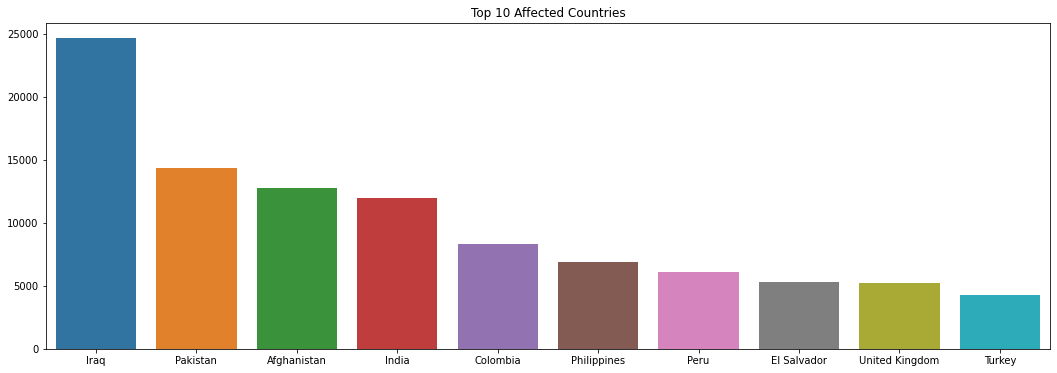

In [ ]:
plt.subplots(figsize=(18,6))
sns.barplot(df['Country'].value_counts()[:10].index, df['Country'].value_counts()[:10].values)
plt.title('Top 10 Affected Countries')
plt.show()

Iraq dominates all the countries and it has the highest number of attacks and then Pakistan, Afghanistan, and India follow it. Government should increase safety measures in these countries.

**Chart- 6**
## **Terrotist Group with Highest Terror Attack**

In [ ]:
df['Group'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: Group, Length: 3537, dtype: int64

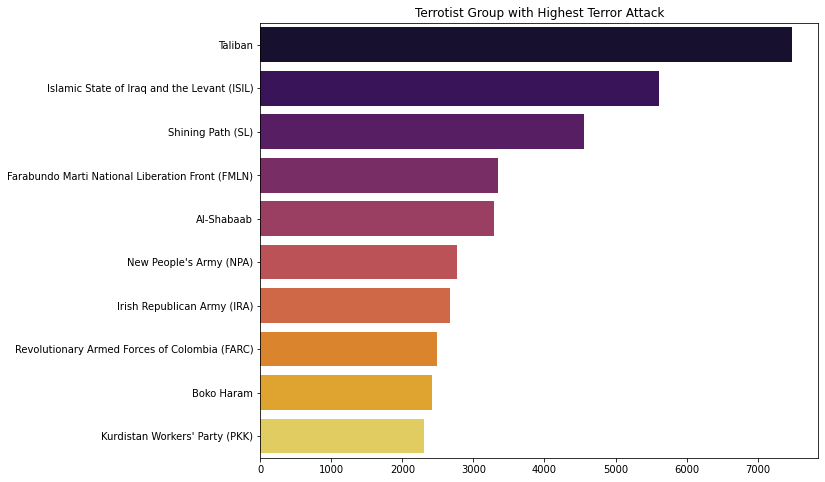

In [ ]:
plt.subplots(figsize=(10,8))
sns.barplot(df['Group'].value_counts()[1:11].values,df['Group'].value_counts()[1:11].index,palette=('inferno'))
plt.title("Terrotist Group with Highest Terror Attack")
plt.show()

On the above chart  number of terror attacks done by a group since 1970, 'Taliban' tops the chart with more attacks. while 'Islamic State of Iraq & the Levant (ISIL)' hold the second place

**Chart- 7**
##**Number of kill by each terrorist Organisation**

In [ ]:
group=df[['Group','Country','Killed']]
group=group.groupby(['Group','Country'],axis=0).sum().sort_values('Killed',ascending=False).drop('Unknown').reset_index().head(10)
group

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Group,Country,Killed
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


**Chart- 8**
## **Terrorist Targeted places**

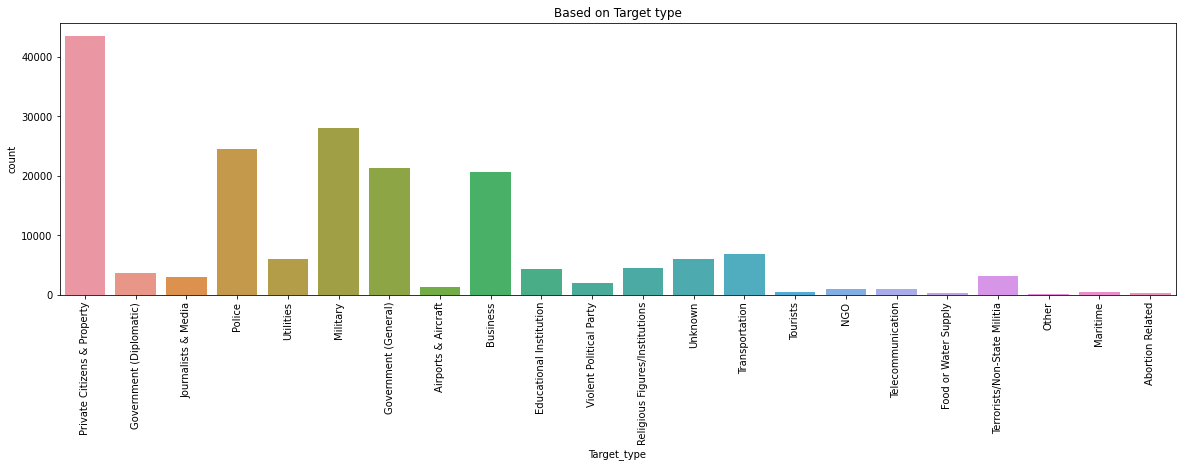

In [ ]:
plt.figure(figsize=(20,5));
plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 90)
plt.title('Based on Target type')
sns.countplot(x=df.Target_type);

For most of the attacks, the target is Private Citizens& property and the next Military leads.

### **Chart- 9**
## **Terrorist Activities on World map**

In [9]:
terror=df.groupby(['Country'],as_index=False).count()

In [10]:
fig=px.choropleth(terror,locations='Country',locationmode='country names',
                  color='Year',hover_name='Country',projection='orthographic',
                  title='Total number of attacks (1970-2017)',labels={'Year':'Attacks'})
fig.show()

### **Chart- 10**
## **Terrorism Activity Trend in India**

In [ ]:
# Filtering data with India only row values at country column
Ind_data=df.loc[df.Country=='India']

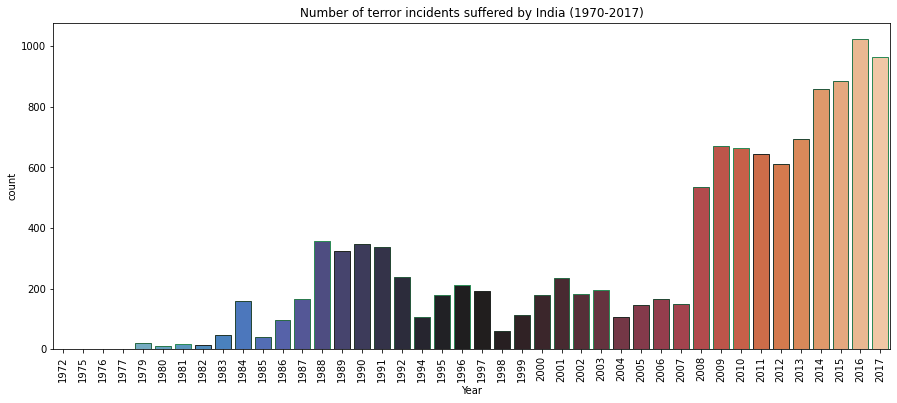

In [ ]:
# Using matplotlib to plot a line chart to vitualize the data above

plt.subplots(figsize=(15,6))
sns.countplot('Year',data= Ind_data, palette='icefire', edgecolor = sns.dark_palette("seagreen",7))
plt.xticks(rotation = 90)
plt.title('Number of terror incidents suffered by India (1970-2017)')
plt.show()

## **Number of Attacks & Causalities by City since 1970**

In [ ]:
# Grouping the city column with total number of confirmed kills and wounded counts to get an idea of the situation 
attack_loc = Ind_data['city'].value_counts().reset_index().rename(columns={'index':'city','city':'No_of_Attacks'})
death_count = Ind_data.groupby(['city'])['Total_Casualities'].sum().reset_index()

death_count_per_loc = attack_loc.merge(death_count, how='inner', on='city')
death_count_per_loc[:10]

,city,No_of_Attacks,Total_Casualities
0,Srinagar,658,3134.0
1,Unknown,624,2527.0
2,Imphal,426,603.0
3,New Delhi,157,2095.0
4,Amritsar,138,768.0
5,Sopore,102,389.0
6,Ludhiana,77,386.0
7,Guwahati,77,822.0
8,Anantnag,76,506.0
9,Jammu,57,1119.0


In [ ]:
# Exploring the most attacked City in India i.e Srinagar
srinagar_data = Ind_data.loc[Ind_data.city == 'Srinagar']
srinagar_terror_log = srinagar_data['Group'].value_counts()
srinagar_terror_log.head(10)

Unknown                               306
Muslim Separatists                     55
Jammu and Kashmir Liberation Front     45
Kashmiri extremists                    37
Muslim Militants                       35
Hizbul Mujahideen (HM)                 31
Lashkar-e-Taiba (LeT)                  21
Separatists                            21
Jaish-e-Mohammad (JeM)                 12
Al-Mansoorian                          12
Name: Group, dtype: int64

Since 1972, Srinagar which is in Jammu and Kashmir has been the center of the dispute and terror attacks in india. Srinagar has been under attacks record 658 times on which 3134 poeple have lost there lives. Almost half of those number of attacks has been done by Unknown groups. On the second place, Srinagar has been terrorised 55 times by 'Muslim Separatists' and 45 times by 'Jammu and Kashmir Liberation Front'.


### **Chart- 11**
## **Top 10 Terrorist Group activities and there most used Attack Type agaist India Since 1970**

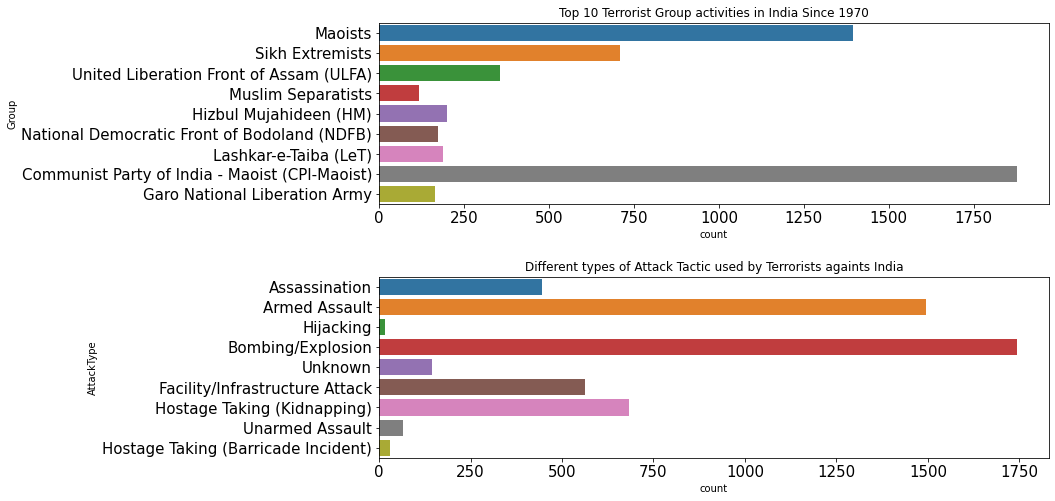

In [ ]:
# Setting up the subplot
fig,ax = plt.subplots(2, 1, figsize = (12,8))
# Creating a filttered daata with respect to top 10 active Terror_Groups
top_groups_ind = Ind_data[Ind_data['Group'].isin(Ind_data['Group'].value_counts()[1:10].index)]

sns.countplot(y = 'Group', data = top_groups_ind, ax = ax[0])
ax[0].set_title('Top 10 Terrorist Group activities in India Since 1970')

# And Most used attack tactic used
sns.countplot(y='AttackType', data = top_groups_ind, ax=ax[1])
ax[1].set_title('Different types of Attack Tactic used by Terrorists againts India')

plt.subplots_adjust(hspace=0.4, wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

## **Terrorist Attack on Five Main Continent on Map Visualisation**

### **Chart- 12**
## **Terrorist Attack on Asia**

In [11]:
#World Map
geo=pd.DataFrame({'Country': df['Country'].value_counts().index,
                   'Number_of_Attacks': df['Country'].value_counts().values})

fig = px.choropleth(geo, locations="Country", 
                    locationmode="country names", color="Number_of_Attacks", 
                    hover_name="Country", range_color=[1, 1000], 
                    color_continuous_scale='cividis', scope ='asia',
                    title='Number of Terrorist Attacks in Asia')
fig.update(layout_coloraxis_showscale=True)
fig.show()

The Most of Casuality happened in western part of Asia like Turkey,Syria,Iraq,Yemen in these Countries most Terrorist Attacked country is Iraq After that Southest part of Asia Terrorist Attack suffered Country like Afganistan , Pakistan , India ,Bngladesh,Thailand,Philippines in these Countries most Terrorist attacked country is Pakistan and the otherside Iran,Saudi-Arbia,Myanmar,Indonesia these countries got less number of Terrorist Attcked .

### **Chart- 13**
## **Terrorist Attack on Africa**

In [12]:
geo=pd.DataFrame({'Country': df['Country'].value_counts().index,
                   'Number_of_Attacks': df['Country'].value_counts().values})

fig = px.choropleth(geo, locations="Country", 
                    locationmode="country names", color="Number_of_Attacks", 
                    hover_name="Country", range_color=[1, 1000], 
                    color_continuous_scale='cividis', scope ='africa',
                    title='Number of Terrorist Attacks in Africa')
fig.update(layout_coloraxis_showscale=True)
fig.show()

Northen boarder countries like Algeria, Libya ,Egypt,Sudan of Africa got more casuality. In the Eastern Countries Somalia is most Terrorist attacked countries in Africa and the western country Nigeria and Southern Country South Africa Also Heavily attacked by terrorist.

### **Chart- 14**
## **Terrorist Attacks in Europe**

In [13]:
geo=pd.DataFrame({'Country': df['Country'].value_counts().index,
                   'Number_of_Attacks': df['Country'].value_counts().values})

fig = px.choropleth(geo, locations="Country", 
                    locationmode="country names", color="Number_of_Attacks", 
                    hover_name="Country", range_color=[1, 1000], 
                    color_continuous_scale='cividis', scope ='europe',
                    title='Number of Terrorist Attacks in Europe')
fig.update(layout_coloraxis_showscale=True)
fig.show()

Western Europe Countries like United Kingdom,France,Spain,Italy,Greece got more Terrorist Casuality.In northern part of Europe Ukraine is also Terrorist attacked Country in Europe continent. For buiesness point of view Eastern and northern part of Europe Continent are good for Business .

### **Chart- 15**
## **Terrorist Attacks in North America**

In [14]:
geo=pd.DataFrame({'Country': df['Country'].value_counts().index,
                   'Number_of_Attacks': df['Country'].value_counts().values})

fig = px.choropleth(geo, locations="Country", 
                    locationmode="country names", color="Number_of_Attacks", 
                    hover_name="Country", range_color=[1, 1000], 
                    color_continuous_scale='cividis', scope ='north america',
                    title='Number of Terrorist Attacks in North America')
fig.update(layout_coloraxis_showscale=True)
fig.show()

In Northen America United State and Gauatemala,Nicaragua got More Terrorist Casuality.After this Mexico got less number of Terrorist attacked in Country and the safest country in North America is Canada and The highest one is United State.

### **Chart- 16**
## **Terrorist Attacks in South America**

In [15]:
geo=pd.DataFrame({'Country': df['Country'].value_counts().index,
                   'Number_of_Attacks': df['Country'].value_counts().values})

fig = px.choropleth(geo, locations="Country", 
                    locationmode="country names", color="Number_of_Attacks", 
                    hover_name="Country", range_color=[1, 1000], 
                    color_continuous_scale='cividis', scope ='south america',
                    title='Number of Terrorist Attacks in South America')
fig.update(layout_coloraxis_showscale=True)
fig.show()

In the South America Western boarder is most Terrorist Attacked Country like Colombia,Peru,Chile and Argentina got less attacked by Terrorist and The Most Terrorist Attcked Country is Colombia.  

## **Conclusion**



*  Iraq – the country has faced staggaring 24636 number of such attacks between 1970 to 2017 which accounted for 13.61% of terrorism attacks in the world.
*  Attacks were more during 2014 and then in 2015. When compared to attacks from 1970 onwards, the last 6 years scored a maximum. But from 2014 onwards count started decreasing.


*  Iraq dominates all the countries and it has the highest number of attacks and then Pakistan, Afghanistan, and India follow it.
*  Middle East and North Africa and South Asia are the two regions who got more terror attacks since 1970


*  For most of the attacks, The target is Private Citizens & property and the next is on Military leads.
*  Most of the attacks were through either Bombing or Explosion.


*  'Islamic State of Iraq and the Levant (ISIL)' were on a killing sprea where they murdured 31,058 personal since 1970, Most on compared to other groups. Taliban is again on second place with 29,269 kills.
*  'Islamic State of Iraq & the Levant (ISIL)' and 'Taliban' are two most active Terorrist groups in the last 5 years.


*  Srinagar which is in Jammu and Kashmir has been the center of the dispute and terror attacks in india.
*  Seems like Terrorist do like 'Explosives' very much like this is the most used Weapon category across the world terror groups.